In [1]:
import pandas as pd
import os

import subprocess
from statsmodels.stats.multitest import multipletests

In [2]:
# wza_kendalltau_results_bio1.csv'
# wza_results_lfmm_bio1.csv

In [3]:
import pickle
dict_blocks = '../key_files/blocks_snpsid_dict.pkl'

with open(dict_blocks, 'rb') as file:
    dict_blocks = pickle.load(file)

reverse_mapping = {item: key for key, values in dict_blocks.items() for item in values}

In [4]:
#dict_blocks['2_1265']#[-1] # 2:9540996-9714921   2_11533904  2_11534263

In [5]:
## all samples wza on lfmm
top_candidate = pd.read_csv('../wza/wza_results_lfmm_bio1_poly7.csv')

In [6]:
top_candidate = top_candidate.rename(columns = {'gene':'block'})

In [7]:
sig_top_candidate = top_candidate[top_candidate['top_candidate_p'] <= 0.05/len(top_candidate)]

In [8]:
## all samples wza on lfmm
wza_lfmm = pd.read_csv('../wza/wza_results_lfmm_bio1_poly7.csv')

In [9]:
wza_lfmm

,gene,SNPs,hits,Z,top_candidate_p,Z_pVal
0,1_0,198,0,-6.628373,1.0,0.862165
1,1_1,3,0,2.004490,1.0,0.065352
2,1_10,22,0,-0.083653,1.0,0.504721
3,1_100,53,0,-0.937833,1.0,0.589655
4,1_1000,9,0,0.012213,1.0,0.488026
...,...,...,...,...,...,...
16651,5_995,39,0,-0.621054,1.0,0.567577
16652,5_996,3,0,1.622175,1.0,0.109817
16653,5_997,27,0,4.765707,1.0,0.036032
16654,5_998,7,0,-1.304242,1.0,0.786601


In [9]:
wza_lfmm = wza_lfmm.rename(columns = {'gene':'block'})

In [10]:
wza_lfmm['BH_corrected_p'] = multipletests(wza_lfmm['Z_pVal'], method='fdr_bh')[1]
sign_wza_lfmm = wza_lfmm[wza_lfmm['BH_corrected_p'] < 0.05]

In [11]:
## all samples wza on kendalltau
wza_kendall = pd.read_csv('../wza/wza_kendalltau_results_bio1_poly7.csv')

In [12]:
wza_kendall['BH_corrected_p'] = multipletests(wza_kendall['Z_pVal'], method='fdr_bh')[1]
sign_wza_kendall = wza_kendall[wza_kendall['BH_corrected_p'] < 0.05]
sign_wza_kendall = sign_wza_kendall.rename(columns = {'gene':'block'})

In [13]:
#linages_wza_picmin = pd.read_csv('../linages_wza_picmin/linage_based_kendall_wza_picmin.csv')

In [14]:
#linages_wza_picmin[linages_wza_picmin['n_est'] ==12].sort_values('p')

In [15]:
#th = 0.05/len(linages_wza_picmin)

In [16]:
#sign_linages_wza_picmin = linages_wza_picmin[linages_wza_picmin['p'] <= th]

In [17]:
#sign_linages_wza_picmin = sign_linages_wza_picmin.rename(columns = {'locus':'block'})

In [18]:
binomial_reg = pd.read_csv('../wza/wza_binomial_regression_bio1_poly7.csv')
binomial_reg['BH_corrected_p'] = multipletests(binomial_reg['Z_pVal'], method='fdr_bh')[1]
sign_binomial_reg = binomial_reg[binomial_reg['BH_corrected_p'] < 0.05]
sign_binomial_reg = sign_binomial_reg.rename(columns = {'gene':'block'})

In [19]:
sign_binomial_reg['block'].values

array(['1_1113', '1_168', '1_212', '1_2303', '1_366', '3_2855', '4_1194',
       '4_1405', '4_2096', '4_2115', '4_2683', '5_2132', '5_571', '5_734',
       '5_758'], dtype=object)

In [20]:
sign_wza_lfmm.merge(sign_wza_kendall, on ='block')

,block,SNPs_x,hits_x,Z_x,top_candidate_p_x,Z_pVal_x,BH_corrected_p_x,SNPs_y,hits_y,Z_y,top_candidate_p_y,Z_pVal_y,BH_corrected_p_y
0,2_1265,16,15,11.151806,1.585000e-29,5.935324e-08,0.000989,16,5,9.028052,3.984317e-07,3.677739e-06,0.009731
1,2_199,10,9,8.515266,9.910000e-18,7.089598e-07,0.003936,10,9,9.224959,9.910000e-18,4.438266e-08,0.000739
2,4_801,225,130,23.960528,7.309601e-196,3.226351e-05,0.036668,225,146,31.615317,5.445274e-231,1.892794e-07,0.001051


In [21]:
sign_wza_lfmm.merge(sign_binomial_reg, on ='block')

,block,SNPs_x,hits_x,Z_x,top_candidate_p_x,Z_pVal_x,BH_corrected_p_x,SNPs_y,hits_y,Z_y,top_candidate_p_y,Z_pVal_y,BH_corrected_p_y
0,3_2855,48,6,14.343321,0.000009,0.000029,0.036668,48,43,15.231927,1.630255e-80,0.000014,0.02854


In [22]:
sign_wza_kendall.merge(sign_binomial_reg, on ='block')

,block,SNPs_x,hits_x,Z_x,top_candidate_p_x,Z_pVal_x,BH_corrected_p_x,SNPs_y,hits_y,Z_y,top_candidate_p_y,Z_pVal_y,BH_corrected_p_y


In [23]:
sign_wza_lfmm.merge(sign_wza_kendall, on ='block').merge(sign_binomial_reg,on ='block')

,block,SNPs_x,hits_x,Z_x,top_candidate_p_x,Z_pVal_x,BH_corrected_p_x,SNPs_y,hits_y,Z_y,top_candidate_p_y,Z_pVal_y,BH_corrected_p_y,SNPs,hits,Z,top_candidate_p,Z_pVal,BH_corrected_p


In [ ]:
2_199

In [33]:
blocks_union = sign_wza_lfmm.merge(sign_wza_kendall, on ='block', how = 'outer').merge(sign_binomial_reg, on ='block', how = 'outer')['block']

for i in blocks_union:
    print(i)
    print(dict_blocks[i][0].split('_')[0]+ ':' + dict_blocks[i][0].split('_')[1] + '-' +  dict_blocks[i][0].split('_')[-1] )

1_1318
1:9219501-9219501
1_1594
1:10895628-10895628
1_485
1:3995653-3995653
1_4899
1:26836028-26836028
1_697
1:5983727-5983727
2_1116
2:10302684-10302684
2_1265
2:11533904-11533904
2_199
2:605830-605830
2_827
2:7553538-7553538
3_1136
3:9992426-9992426
3_133
3:1517399-1517399
3_1383
3:11034084-11034084
3_2855
3:18861436-18861436
4_1643
4:9385105-9385105
4_2818
4:16388356-16388356
4_801
4:7255726-7255726
5_1947
5:17738817-17738817
5_2161
5:18878450-18878450
5_2244
5:19684337-19684337
5_600
5:7458505-7458505
1_1391
1:9396749-9396749
1_2013
1:12352269-12352269
1_22
1:163688-163688
1_23
1:164495-164495
2_897
2:8283111-8283111
3_1947
3:16446515-16446515
3_2730
3:18471464-18471464
3_2772
3:18529963-18529963
3_3044
3:19814798-19814798
4_1986
4:10148608-10148608
5_1267
5:16033113-16033113
5_2227
5:19276567-19276567
1_1113
1:8351672-8351672
1_168
1:1037947-1037947
1_212
1:1594870-1594870
1_2303
1:17154482-17154482
1_366
1:3022765-3022765
4_1194
4:8177945-8177945
4_1405
4:8916839-8916839
4_2096
4

In [25]:
sign_wza_lfmm.merge(sign_wza_kendall, on ='block', how = 'outer').merge(sign_binomial_reg, on ='block', how = 'outer')

,block,SNPs_x,hits_x,Z_x,top_candidate_p_x,Z_pVal_x,BH_corrected_p_x,SNPs_y,hits_y,Z_y,top_candidate_p_y,Z_pVal_y,BH_corrected_p_y,SNPs,hits,Z,top_candidate_p,Z_pVal,BH_corrected_p
0,1_1318,44.0,22.0,13.132881,1.703152e-32,5.876380e-05,0.048938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1_1594,30.0,15.0,12.340603,1.346841e-22,5.683843e-06,0.023668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1_485,36.0,3.0,12.925697,5.580758e-03,1.359254e-05,0.025155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1_4899,574.0,149.0,35.562337,3.035676e-159,3.393512e-07,0.002826,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1_697,11.0,6.0,7.317968,4.425434e-10,2.957782e-05,0.036668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2_1116,26.0,22.0,10.800096,1.438617e-40,1.875456e-05,0.031238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2_1265,16.0,15.0,11.151806,1.585000e-29,5.935324e-08,0.000989,16.0,5.0,9.028052,3.984317e-07,3.677739e-06,0.009731,NaN,NaN,NaN,NaN,NaN,NaN
7,2_199,10.0,9.0,8.515266,9.910000e-18,7.089598e-07,0.003936,10.0,9.0,9.224959,9.910000e-18,4.438266e-08,0.000739,NaN,NaN,NaN,NaN,NaN,NaN
8,2_827,141.0,82.0,22.186910,1.602818e-124,3.302258e-05,0.036668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,3_1136,24.0,9.0,10.000855,1.141790e-12,3.631918e-05,0.037808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
sign_wza_lfmm['model'] = 'wza_lfmm_f'
sign_wza_lfmm['gen'] = 'first_gen'

sign_wza_kendall['model'] = 'wza_kendall_f'
sign_wza_kendall['gen'] = 'first_gen'

sign_binomial_reg['model'] = 'wza_binom_reg_f'
sign_binomial_reg['gen'] = 'first_gen'

sign_blocks_union = pd.concat([sign_wza_lfmm[['block', 'model', 'gen']], 
          sign_wza_kendall[['block', 'model', 'gen']],
          sign_binomial_reg[['block', 'model', 'gen']]]).reset_index(drop=True)

/tmp/ipykernel_2785144/1016914727.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sign_wza_lfmm['model'] = 'wza_lfmm_f'
/tmp/ipykernel_2785144/1016914727.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sign_wza_lfmm['gen'] = 'first_gen'


In [27]:
sign_blocks_union['model'] = sign_blocks_union.groupby('block')['model'].transform(lambda x: ','.join(x.unique().astype(str)))
sign_blocks_union['gen'] = sign_blocks_union.groupby('block')['gen'].transform(lambda x: ','.join(x.unique().astype(str)))

sign_blocks_union = sign_blocks_union.drop_duplicates()

In [28]:
sign_blocks_union

,block,model,gen
0,1_1318,wza_lfmm_f,first_gen
1,1_1594,wza_lfmm_f,first_gen
2,1_485,wza_lfmm_f,first_gen
3,1_4899,wza_lfmm_f,first_gen
4,1_697,wza_lfmm_f,first_gen
5,2_1116,wza_lfmm_f,first_gen
6,2_1265,"wza_lfmm_f,wza_kendall_f",first_gen
7,2_199,"wza_lfmm_f,wza_kendall_f",first_gen
8,2_827,wza_lfmm_f,first_gen
9,3_1136,wza_lfmm_f,first_gen


In [29]:
sign_blocks_union.to_csv('sign_blocks_union_first_gen_BH.csv', index=None)

In [30]:
import matplotlib
from matplotlib import pyplot as plt

from upsetplot import generate_counts, plot

In [31]:
#sign_linages_wza_picmin = sign_linages_wza_picmin[sign_linages_wza_picmin['n_est'] > 3]

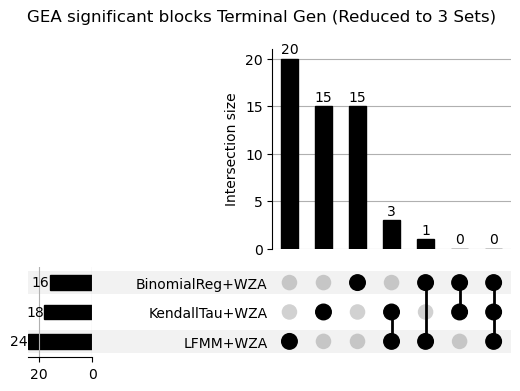

In [32]:
# Extract 'block' columns and convert to sets (excluding set1/picmin)
set2 = set(sign_wza_lfmm['block'])
set3 = set(sign_wza_kendall['block'])
set4 = set(sign_binomial_reg['block'])

# Calculate the unions using set operations
counts = {
    (True, False, False): len(set2),  # Only in set2
    (False, True, False): len(set3),  # Only in set3
    (False, False, True): len(set4),  # Only in set4
    (True, True, False): len(set2.intersection(set3)),  # In set2 and set3 only
    (True, False, True): len(set2.intersection(set4)),  # In set2 and set4 only
    (False, True, True): len(set3.intersection(set4)),  # In set3 and set4 only
    (True, True, True): len(set2.intersection(set3).intersection(set4))  # In set2, set3, and set4
}

# Convert the dictionary to a pandas Series with a MultiIndex
index = pd.MultiIndex.from_tuples(counts.keys(), names=['LFMM+WZA', 'KendallTau+WZA', 'BinomialReg+WZA'])
data = pd.Series(counts, index=index)

# Plot the data
plot(data, show_counts=True)
plt.suptitle("GEA significant blocks Terminal Gen (Reduced to 3 Sets)")
plt.show()


In [28]:
sign_wza_kendall

,block,SNPs,hits,Z,top_candidate_p,Z_pVal
48,1_1040,93,37,14.712225,6.834746e-49,2.455139e-06
431,1_1391,27,19,11.351576,2.056867e-32,6.736171e-08
3851,1_4506,109,8,17.976827,1.550062e-05,1.090242e-07
5406,2_1264,1885,0,2.057459,1.000000e+00,0.000000e+00
5407,2_1265,16,5,9.028052,3.984317e-07,2.119224e-06
6199,2_199,10,9,9.224959,9.910000e-18,3.637041e-07
7135,2_897,30,18,11.773300,7.715812e-29,4.589528e-08
7217,2_973,1843,5,10.919003,9.999435e-01,0.000000e+00
9133,3_2730,53,30,15.113784,4.984762e-46,2.548200e-09
10099,3_551,1849,4,5.318958,9.999891e-01,0.000000e+00


In [34]:
from matplotlib import pyplot as plt

from upsetplot import generate_counts, plot, UpSet

In [35]:
greyscale_colors = ['#666666', '#BBBBBB', '#666666', '#BBBBBB', '#666666', '#BBBBBB']

# Define green tones for significant points (alternating dark and light greens)
green_colors = ['#2aad2a', '#208420'] # 

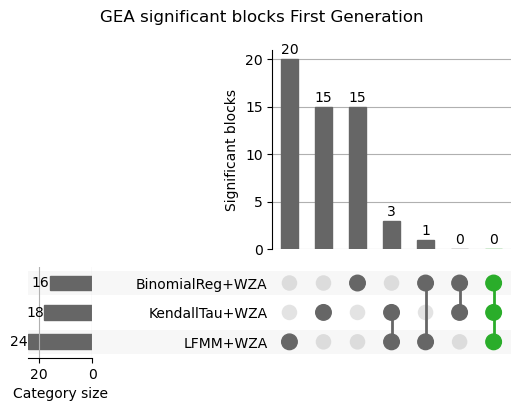

In [36]:
# Create the UpSet plot using the UpSet class
upset = UpSet(data, facecolor="#666666",show_counts=True)

# Style subsets with specific size
upset.style_subsets(min_degree=3, facecolor="#2aad2a")


# Plot the upset plot
plot_result = upset.plot()

plot_result["intersections"].set_ylabel("Significant blocks")
plot_result["totals"].set_xlabel("Category size")
plt.suptitle("GEA significant blocks First Generation")

plt.savefig("gea_significant_blocks.svg",bbox_inches='tight')  # Save as PNG with 300 DPI resolution

# Show the plot
plt.show()

In [34]:
## permutation test 

In [35]:
import numpy as np

In [36]:
# Function to perform permutation test for overlap across all three sets
def permutation_test_3_sets(total1, total2, total3, sig1, sig2, sig3, observed_shared_123, n_permutations=10000):
    overlap_count = 0
    print(total1, total2, total3)
    print(sig1, sig2, sig3)
    print(observed_shared_123)
    # Perform permutations
    for _ in range(n_permutations):
        # Randomly select significant SNPs for each set
        perm_sig1 = np.random.choice(total1, sig1, replace=False)
        perm_sig2 = np.random.choice(total2, sig2, replace=False)
        perm_sig3 = np.random.choice(total3, sig3, replace=False)

        # Find the intersection (shared SNPs) across all three sets
        shared_123 = len(set(perm_sig1) & set(perm_sig2) & set(perm_sig3))

        # Count how many times the shared SNPs meet or exceed the observed value
        if shared_123 >= observed_shared_123:
            overlap_count += 1

    # Calculate empirical p-value
    p_value = overlap_count / n_permutations
    return p_value

In [37]:
# Extract 'block' columns and convert to sets
set1 = set(sign_linages_wza_picmin['block'])
set2 = set(sign_wza_lfmm['block'])
set3 = set(sign_wza_kendall['block'])

In [ ]:
permutation_test_3_sets(len(wza_kendall),
                        len(wza_lfmm),
                        len(linages_wza_picmin),
                        len(sign_wza_kendall),
                        len(sign_wza_lfmm),
                        len(sign_linages_wza_picmin),
                        len(set1.intersection(set2).intersection(set3)),
                        1000000
)

16656 16656 16458
12 22 51
2


In [ ]:
# Function to perform permutation test for overlap across all three sets
def permutation_test_2_sets(total1, total2, sig1, sig2, observed_shared_12, n_permutations=10000):
    overlap_count = 0
    print(total1, total2)
    print(sig1, sig2)
    print(observed_shared_12)
    # Perform permutations
    for _ in range(n_permutations):
        # Randomly select significant SNPs for each set
        perm_sig1 = np.random.choice(total1, sig1, replace=False)
        perm_sig2 = np.random.choice(total2, sig2, replace=False)

        # Find the intersection (shared SNPs) across all three sets
        shared_12 = len(set(perm_sig1) & set(perm_sig2))

        # Count how many times the shared SNPs meet or exceed the observed value
        if shared_12 >= observed_shared_12:
            overlap_count += 1

    # Calculate empirical p-value
    p_value = overlap_count / n_permutations
    return p_value

In [ ]:
permutation_test_2_sets(len(wza_kendall),
                        len(wza_lfmm),
                        len(sign_wza_kendall),
                        len(sign_wza_lfmm),
                        len(set2.intersection(set3)),
                        1000000
)

In [ ]:
permutation_test_2_sets(len(wza_kendall),
                        len(linages_wza_picmin),
                        len(sign_wza_kendall),
                        len(sign_linages_wza_picmin),
                        len(set1.intersection(set3)),
                        1000000
)

In [ ]:
permutation_test_2_sets(len(wza_lfmm),
                        len(linages_wza_picmin),
                        len(sign_wza_lfmm),
                        len(sign_linages_wza_picmin),
                        len(set1.intersection(set2)),
                        1000000
)

In [42]:
selection_atlas = pd.read_csv('../key_files/POP_EVOLUTION_selection_atlas_haplotype_sig_counts.txt',sep='\t')

In [43]:
selection_atlas

,chr,start,end,sig_count
0,1,291,50100,8.0
1,1,50128,50679,5.0
2,1,50754,51298,4.0
3,1,51379,51537,0.0
4,1,51538,51961,4.0
...,...,...,...,...
16912,5,26744719,26745443,0.0
16913,5,26745628,26835506,13.0
16914,5,26835700,26835823,0.0
16915,5,26835839,26973763,13.0


In [44]:
selection_atlas['block'] = selection_atlas['chr'].astype(str) + '_' + selection_atlas['start'].astype(str) 

In [45]:
bb

,chr,start,end,sig_count,block
0,1,291,50100,8.0,1_291
1,1,50128,50679,5.0,1_50128
2,1,50754,51298,4.0,1_50754
3,1,51379,51537,0.0,1_51379
4,1,51538,51961,4.0,1_51538
...,...,...,...,...,...
16912,5,26744719,26745443,0.0,5_26744719
16913,5,26745628,26835506,13.0,5_26745628
16914,5,26835700,26835823,0.0,5_26835700
16915,5,26835839,26973763,13.0,5_26835839


In [50]:
# Create a new column 'chr_rowindex' that combines 'chr' and a zero-based index for each 'chr' group
selection_atlas['chr_rowindex'] = selection_atlas.groupby('chr').cumcount()

# Create an ID that combines 'chr' and the 'chr_rowindex'
selection_atlas['block_id'] = selection_atlas['chr'].astype(str) + "_" + selection_atlas['chr_rowindex'].astype(str)


In [48]:
selection_atlas

,chr,start,end,sig_count,block,chr_rowindex,id
0,1,291,50100,8.0,1_291,0,1_0
1,1,50128,50679,5.0,1_50128,1,1_1
2,1,50754,51298,4.0,1_50754,2,1_2
3,1,51379,51537,0.0,1_51379,3,1_3
4,1,51538,51961,4.0,1_51538,4,1_4
...,...,...,...,...,...,...,...
16912,5,26744719,26745443,0.0,5_26744719,3106,5_3106
16913,5,26745628,26835506,13.0,5_26745628,3107,5_3107
16914,5,26835700,26835823,0.0,5_26835700,3108,5_3108
16915,5,26835839,26973763,13.0,5_26835839,3109,5_3109


In [51]:
selection_atlas[selection_atlas['block_id'].isin(shared_blocks)]

,chr,start,end,sig_count,block,chr_rowindex,id,block_id
6436,2,11533904,11534263,0.0,2_11533904,1265,2_1265,2_1265
11545,4,7255726,7269426,6.0,4_7255726,801,4_801,4_801


In [52]:
dict_blocks['2_1265']

['2_11533904',
 '2_11533924',
 '2_11533937',
 '2_11533944',
 '2_11533991',
 '2_11533994',
 '2_11534005',
 '2_11534015',
 '2_11534022',
 '2_11534023',
 '2_11534030',
 '2_11534048',
 '2_11534063',
 '2_11534092',
 '2_11534094',
 '2_11534099',
 '2_11534102',
 '2_11534143',
 '2_11534161',
 '2_11534165',
 '2_11534224',
 '2_11534244',
 '2_11534263']

In [35]:
selection_atlas

,0,1,2,3,block
0,1,291,7468,1,1_291
1,1,7572,142940,6,1_7572
2,1,142971,143272,0,1_142971
3,1,143366,144872,0,1_143366
4,1,144922,146471,0,1_144922
...,...,...,...,...,...
12104,5,26757463,26758064,0,5_26757463
12105,5,26758076,26759868,0,5_26758076
12106,5,26759901,26795349,6,5_26759901
12107,5,26795383,26884558,7,5_26795383
